Task 1: Load an image, then display it and its histogram on the screen

(array([2968., 1933., 1842., 1847., 2021., 2108., 2405., 2313., 2400.,
        2633., 2702., 3047., 3134., 3436., 3892., 4875., 5307., 5696.,
        4897., 4669., 4288., 4314., 4520., 4902., 5491., 5456., 5795.,
        5892., 6062., 6076., 6453., 6490., 6654., 6398., 6246., 6381.,
        6380., 6165., 6173., 6577., 7196., 6869., 6663., 7344., 8339.,
        7957., 7544., 6796., 6429., 6711., 5451., 4436., 4036., 3827.,
        3469., 3406., 3275., 3377., 3372., 3255., 3564., 3754., 3608.,
        3803., 3492., 3196., 2879., 2796., 2751., 2637., 2795., 2633.,
        2510., 2486., 2581., 2432., 2353., 2409., 2359., 2496., 2546.,
        2458., 2600., 2557., 2546., 2492., 2554., 2508., 2636., 2671.,
        2615., 2729., 2735., 2769., 2692., 2734., 2681., 2631., 2458.,
        2473., 2477., 2425., 2408., 2535., 2467., 2460., 2490., 2470.,
        2385., 2539., 2512., 2472., 2407., 2417., 2322., 2236., 2243.,
        2093., 2191., 2202., 2153., 2139., 2067., 2099., 2006., 2027.,
      

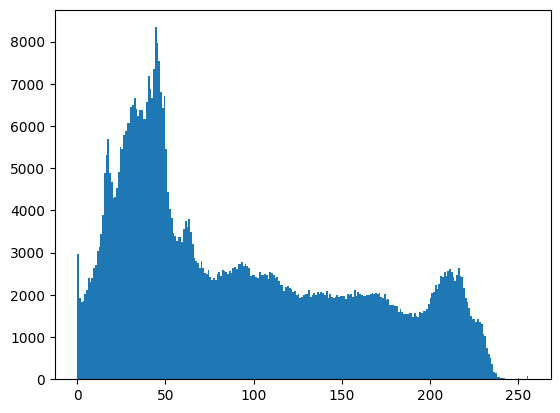

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('photo.jpg', img)
cv2.waitKey(0)
plt.hist(img.ravel(), 256, [0, 256])

Task 2: Apply the averaging filter using the function: cv2.blur(), Gaussian filter using the function cv2.GaussianBlur() and Median filter using the function `cv2.medianBIur()` on the loaded image to blur it. Display the filtered images and compare the difference with the original image.

In [3]:
blur_img = cv2.blur(img, (5, 5))
gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)
cv2.imshow('blur_img', blur_img)
cv2.imshow('gaussian_img', gaussian_img)
cv2.waitKey(0)

-1


Task 3: Add Gaussian noise, Salt and Pepper noise and Periodic noise to the loaded image, then display the noisy images with their corresponding histogram.

In [ ]:
# Gaussian noise
gaussian_img_noise = img.copy()

def gaussian_noise(img):
    import random
    output = np.zeros(img.shape, np.uint8)

    def shift_value(original_value: int, shift_value: int):
        if original_value + shift_value > 255 or original_value + shift_value < 0:
            return original_value
        return original_value + shift_value

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            random_number = random.randint(1, 3)
            if random_number == 1:
                output[i, j] = shift_value(img[i, j], -15)
                # affected_pixel_count -= 1
            elif random_number == 2:
                output[i, j] = shift_value(img[i, j], 15)
                # affected_pixel_count -= 1
            else:
                output[i, j] = img[i, j]
    return output

gaussian_img_noise = gaussian_noise(gaussian_img_noise)

# Salt and Pepper noise
salt_pepper_img_noise = img.copy()
salt_pepper_img_noise[np.random.randint(0, img.shape[0], 100), np.random.randint(0, img.shape[1], 100)] = 255
salt_pepper_img_noise[np.random.randint(0, img.shape[0], 100), np.random.randint(0, img.shape[1], 100)] = 0

# Periodic noise
periodic_img_noise = img.copy()
periodic_img_noise[::2, ::2] = 0
periodic_img_noise[1::2, 1::2] = 255

cv2.imshow('gaussian_img_noise', gaussian_img_noise)
cv2.imshow('salt_pepper_img_noise', salt_pepper_img_noise)
cv2.imshow('periodic_img_noise', periodic_img_noise)
cv2.waitKey(0)


Task 4: Apply the averaging filter, Gaussian filter, and Median filter to the three noisy images to remove noise. Display the noisy images and the noise removal images to see the difference.

In [24]:
# gaussian noise -> gaussian filter
gaussian_img_noise_gaussian_filter = cv2.GaussianBlur(gaussian_img_noise, (5, 5), 0)

# salt and pepper noise -> averaging filter
salt_pepper_img_noise_averaging_filter = cv2.blur(salt_pepper_img_noise, (5, 5))

# periodic noise -> median filter
periodic_img_noise_median_filter = cv2.medianBlur(periodic_img_noise, 3)

cv2.imshow('gaussian_img_noise_gaussian_filter', gaussian_img_noise_gaussian_filter)
cv2.imshow('salt_pepper_img_noise_averaging_filter', salt_pepper_img_noise_averaging_filter)
cv2.imshow('periodic_img_noise_median_filter', periodic_img_noise_median_filter)
cv2.waitKey(0)

-1

Task 5: Transform the periodic noisy image from spatial domain to frequency domain using Fourier transform, then:
  1. Perform noise removal on the transformed image using frequency filtering
  2. Perform Inverse Fourier Transform to convert the image from frequency domain back to spatial domain
  3. Display the periodic noisy image and the filtered image together for comparison

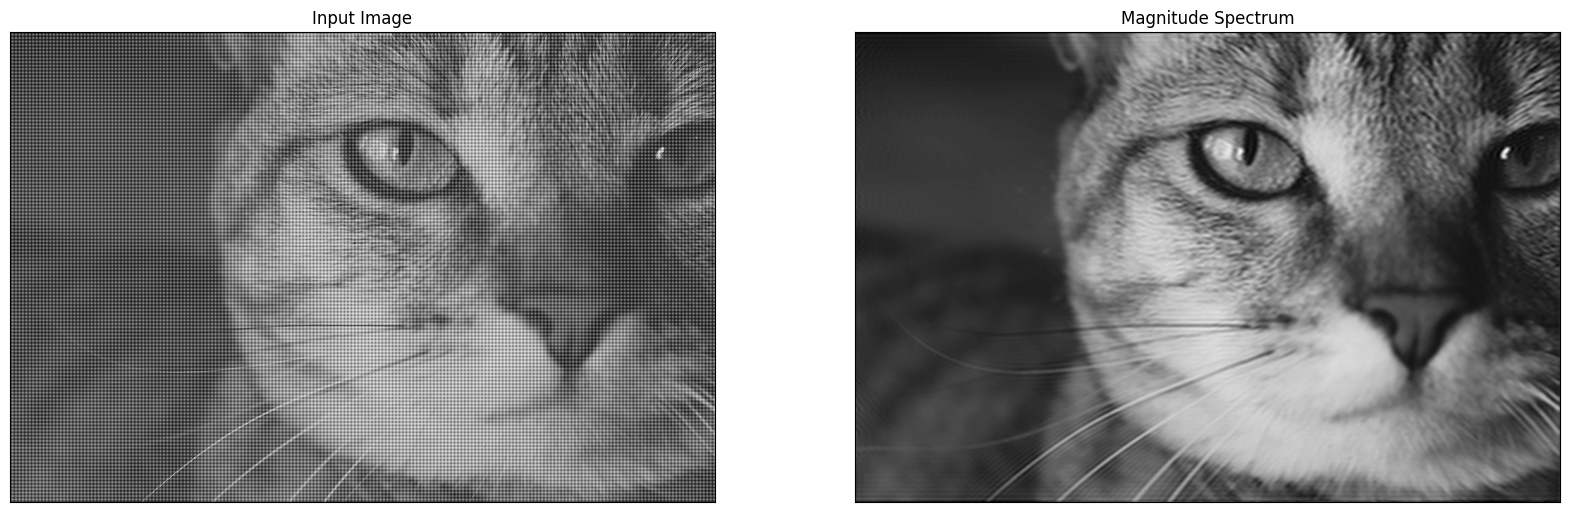

In [36]:
# Fourier transform
periodic_img_noise_fourier_transform = np.fft.fft2(periodic_img_noise)
periodic_img_noise_fourier_transform_shifted = np.fft.fftshift(periodic_img_noise_fourier_transform)
periodic_img_noise_fourier_transform_magnitude_spectrum = 20 * np.log(np.abs(periodic_img_noise_fourier_transform_shifted))

# Frequency filtering
INTENSITY = 100
rows, cols = periodic_img_noise.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols), np.uint8)
mask[crow - INTENSITY:crow + INTENSITY, ccol - INTENSITY:ccol + INTENSITY] = 1
periodic_img_noise_fourier_transform_shifted_filtered = periodic_img_noise_fourier_transform_shifted * mask

# Inverse Fourier Transform
periodic_img_noise_fourier_transform_filtered = np.fft.ifftshift(periodic_img_noise_fourier_transform_shifted_filtered)
periodic_img_noise_fourier_transform_filtered = np.fft.ifft2(periodic_img_noise_fourier_transform_filtered)
periodic_img_noise_fourier_transform_filtered = np.abs(periodic_img_noise_fourier_transform_filtered)

# Display
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(periodic_img_noise, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(periodic_img_noise_fourier_transform_filtered, cmap='gray')

plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()